## Observations and Insights 

## First observation: While Pymaceuticals' drug of interest, Capomulin, showed promising results in this study, Ramicane was very similar (and even slightly better) in many respects including mean, variance, and standard deviation of tumor volume. While Capomulin showed a low mean for tumor volume (40.68 mm3) and final tumor volume(36.67mm3), Ramicane was slightly better in both categories (40.22 mm3 and 36.19mm3, respectively), which may mean it is comparable in efficacy.

## Second observation: Although Capomulin shows good overall results in the study, some concerns can be seen if looking into individual mice, such as Mouse ID i557 (see graph below). While initial measurements show tumor volume decrease in this mouse, after timepoint 5, a steady increase of tumor volume can be seen. This should be investigated for this mouse and any others showing this trend.

## Third observation: There is a strong positive correlation between average tumor volume and mouse weight. It would be interesting to investigate this further, and possibly look into average tumor growth over time compared to mouse weight. If tumors tend to grow faster or larger in mice with greater weights on this drug regimen, this may be concerning when moving to human trials where weights are much greater.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_study_df["Mouse ID"].value_counts()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]  
dup_mice = dup_mice["Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_info = mouse_study_df.loc[mouse_study_df["Mouse ID"]==dup_mice[0]]
dup_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df["Mouse ID"] != dup_mice[0]]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mouse_df["Mouse ID"].value_counts()
len(num_mice_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#create needed lists
mean_drugs= []
median_drugs = []
variance_drugs = []
std_dev_drugs = []
SEM_drugs =  []

#get an array of the drugs and make into a series
drugs = clean_mouse_df["Drug Regimen"].unique()
drugs_series = pd.Series(drugs)
drugs_series = drugs_series.rename("Drug Regimen")

#loop through drugs to get each statistic
for drug in drugs:
    #locate current drug in clean_mouse_df 
    drug_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == drug, :]
    #get drug mean and append to list
    drug_mean = round(drug_df["Tumor Volume (mm3)"].mean(),2)
    mean_drugs.append(drug_mean)
    #get drug median and append to list
    drug_median = round(drug_df["Tumor Volume (mm3)"].median(),2)
    median_drugs.append(drug_median)
    #get drug variance and append to list
    drug_var = round(np.var(drug_df["Tumor Volume (mm3)"],ddof = 0),2)
    variance_drugs.append(drug_var)
    #get drug std deviation and append to list
    drug_stdev = round(np.std(drug_df["Tumor Volume (mm3)"],ddof = 0),2)
    std_dev_drugs.append(drug_stdev)
    #get drug SEM and append to list
    drug_sem = round(st.sem(drug_df["Tumor Volume (mm3)"]),2)
    SEM_drugs.append(drug_sem)

#make each list a series and rename
mean_drugs = pd.Series(mean_drugs)
mean_drugs = mean_drugs.rename("Mean of Tumor Vol")
median_drugs = pd.Series(median_drugs)
median_drugs = median_drugs.rename("Median of Tumor Vol")
variance_drugs = pd.Series(variance_drugs)
variance_drugs = variance_drugs.rename("Variance of Tumor Vol")
std_dev_drugs = pd.Series(std_dev_drugs)
std_dev_drugs = std_dev_drugs.rename("Standard Deviation of Tumor Vol")
SEM_drugs = pd.Series(SEM_drugs)
SEM_drugs = SEM_drugs.rename("SEM of Tumor Vol")

#take above series and concat into a dataframe
Sum_table =pd.concat([drugs_series, mean_drugs,median_drugs,variance_drugs,std_dev_drugs,SEM_drugs], axis = 1)
#reset index to drug names column
Sum_table.set_index('Drug Regimen')


,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.38,4.84,0.32
Capomulin,40.68,41.56,24.84,4.98,0.33
Infubinol,52.88,51.82,42.89,6.55,0.49
Placebo,54.03,52.29,60.83,7.80,0.58
Ceftamin,52.59,51.78,39.07,6.25,0.47
Stelasyn,54.23,52.43,59.12,7.69,0.57
Zoniferol,53.24,51.82,48.27,6.95,0.52
Ketapril,55.24,53.70,68.19,8.26,0.60
Propriva,52.32,50.45,43.56,6.60,0.54


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Aggregate data
#source: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
drug_group = clean_mouse_df.groupby("Drug Regimen").aggregate([np.mean, np.median, np.var, np.std, st.sem])
#keep only the columns of interest and rename them
drug_group_org = drug_group["Tumor Volume (mm3)"]
drug_group_org = drug_group_org.rename(columns ={"mean":"Mean of Tumor Vol", "median":"Median of Tumor Vol", "var":"Variance of Tumor Vol", "std":"Standard Deviation of Tumor Vol", "sem":"SEM of Tumor Vol"})

#round all data in dataframe
#source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
drug_group_org.round(2)

,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

(0, 28)

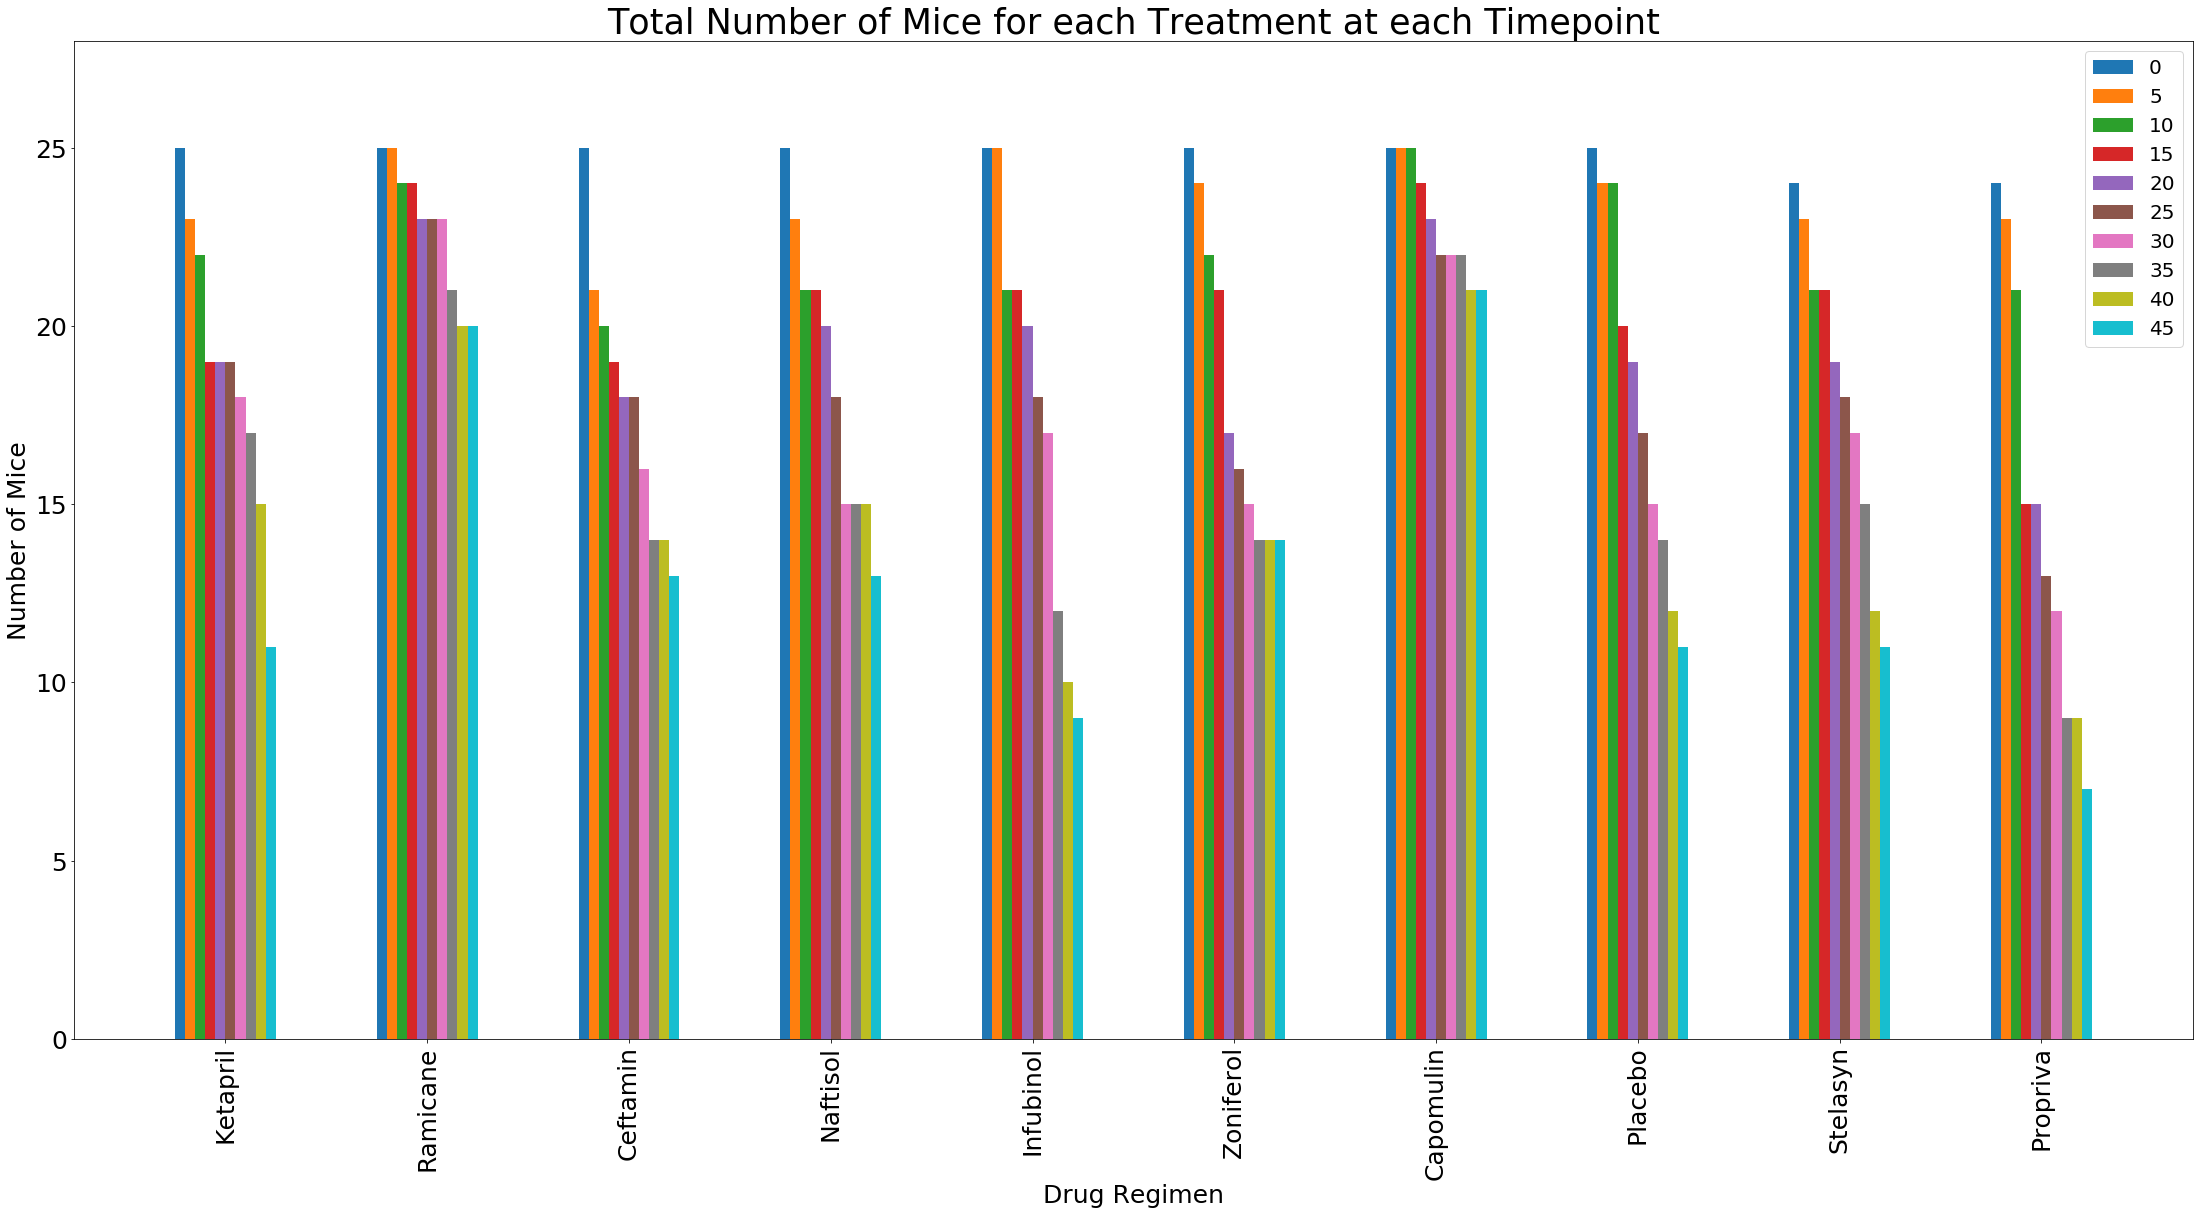

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#find each unique timepoint
timept = clean_mouse_df["Timepoint"].unique()

#create empty dataframe
mice_time_bar = pd.DataFrame()

#loop through each timepoint in original dataframe to get number of mice per drug regimen
#add new column to empty dataframe with data of each timepoint
for time in timept:
    time_bar_df = clean_mouse_df.loc[clean_mouse_df["Timepoint"] == time, :]
    mice_drug_count = time_bar_df["Drug Regimen"].value_counts()
    mice_time_bar[time] = mice_drug_count
    
#plot bar chart using dataframe
#add legend, title, x and y axis titles and update font sizes
mice_time_bar.plot(kind = 'bar', figsize = (30,15))
plt.tight_layout()
plt.legend(loc = "upper right", fontsize = 20)
plt.title("Total Number of Mice for each Treatment at each Timepoint", fontsize=35)
plt.xlabel("Drug Regimen", fontsize = 25)
plt.ylabel("Number of Mice", fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(-0.75, len(mice_time_bar)-0.25)
plt.ylim(0, max(mice_time_bar[0]+3))


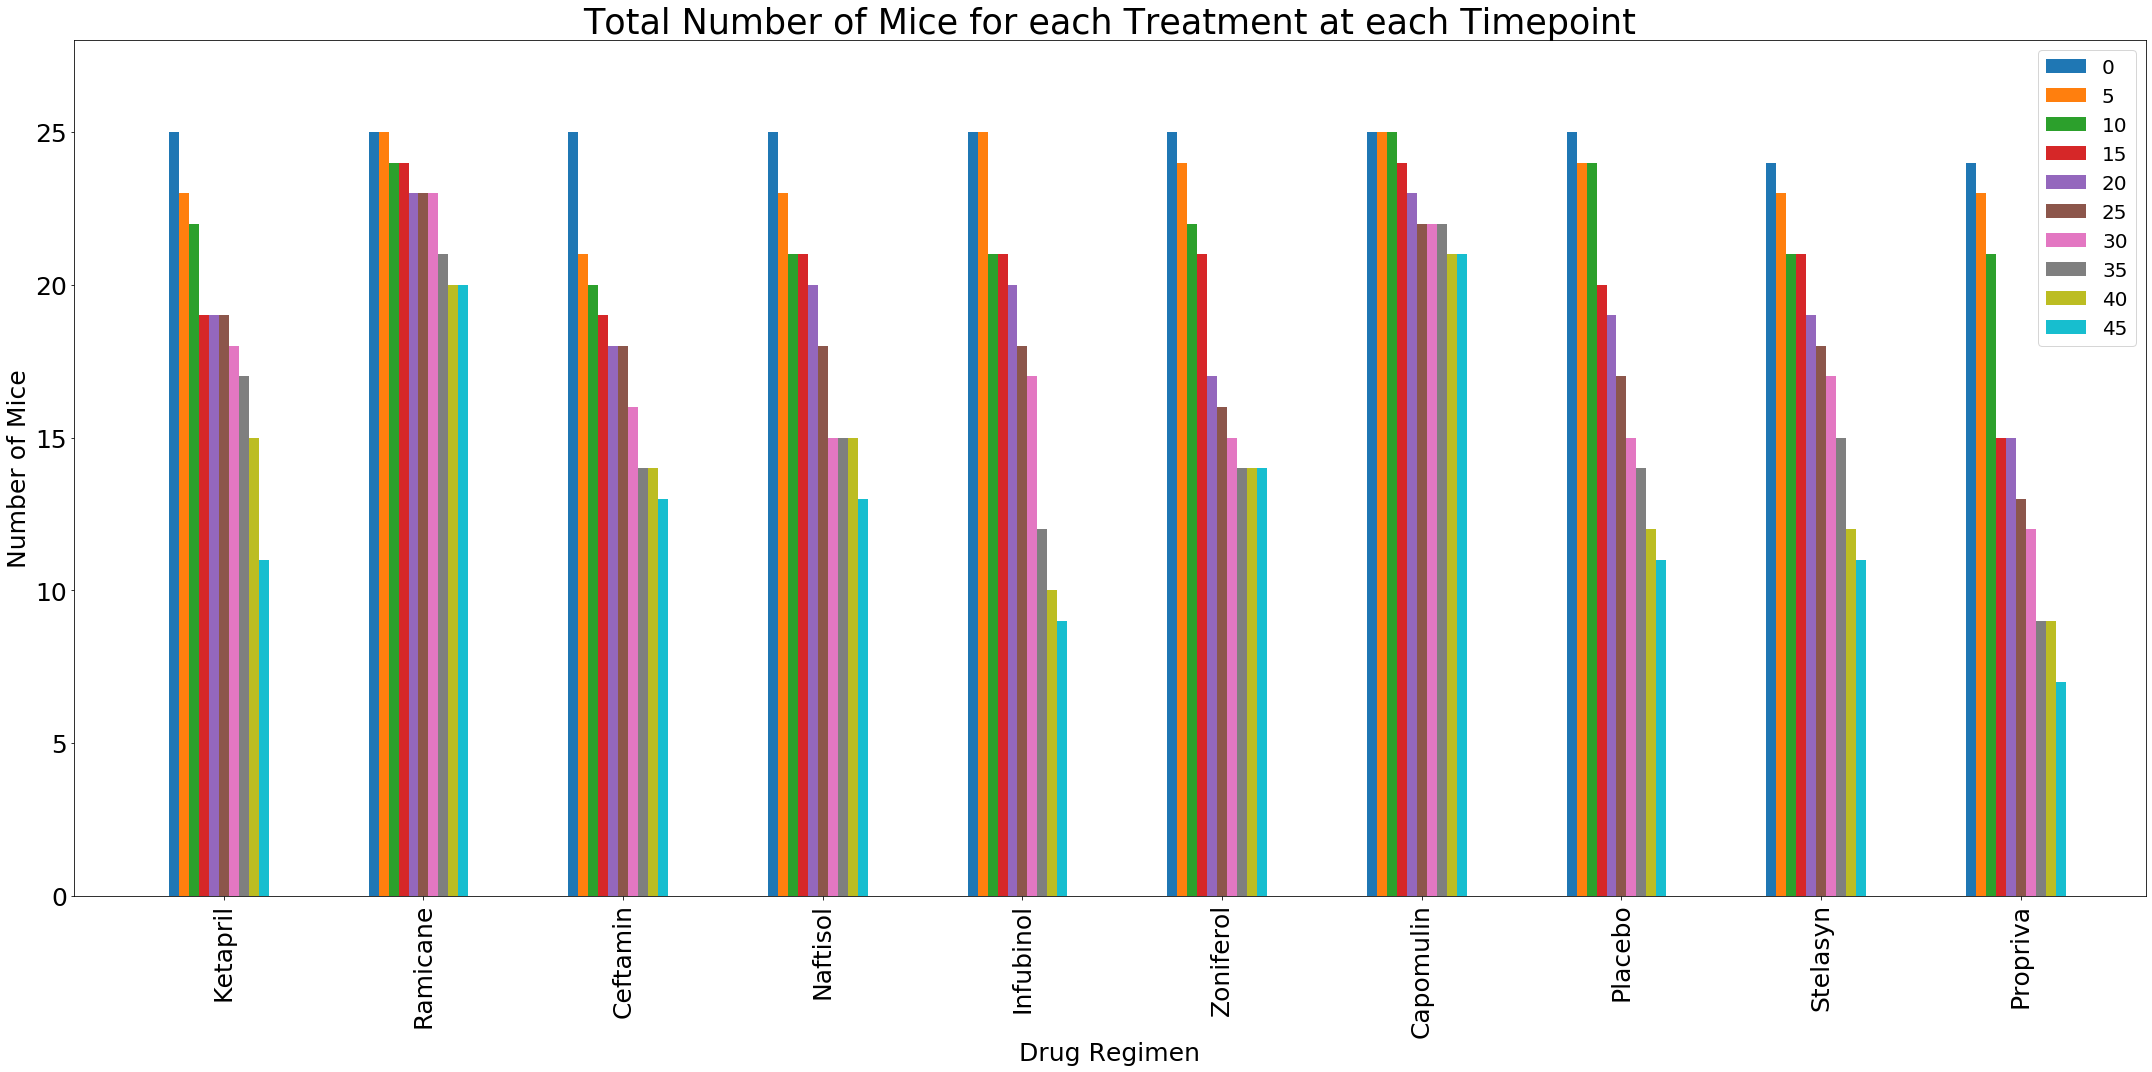

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#set index for where each bar will plot
ind = np.arange(0,20,2)
#set bar width
width = 0.1
#initialize counters needed for for loop
time_counter = 0
counter = -5
#set figure size
plt.figure(figsize = (30,15))

#loop through each timepoint in newly created dataframe from above bar chart (mice_time_bar) 
#for each loop, add a bar for each timepoint to each drug regimen
for time in timept:
    plt.bar(ind +(counter* width), mice_time_bar[time], width,label=timept[time_counter])
    #iterate counter to move each bar over one bar width
    counter = counter+1
    #iterate time_counter to get next timepoint for label
    time_counter = time_counter+1

#add legend, title, x and y axis titles and update font sizes
plt.xticks(ind,mice_time_bar.index, rotation = 'vertical')
plt.legend(loc = "upper right", fontsize = 20)
plt.title("Total Number of Mice for each Treatment at each Timepoint", fontsize=35)
plt.xlabel("Drug Regimen", fontsize = 25)
plt.ylabel("Number of Mice", fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(-1.5, len(mice_time_bar)+9.25)
plt.ylim(0, max(mice_time_bar[0]+3))
plt.tight_layout()

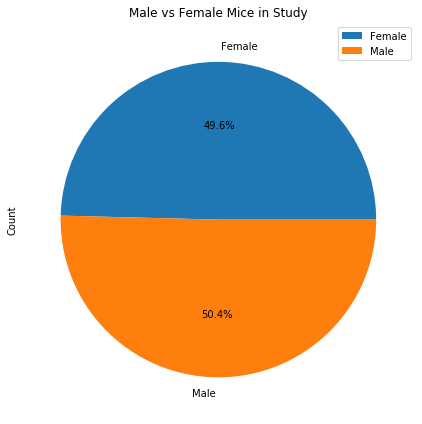

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group by Mouse ID and find individual Gender categories
Gender_df = clean_mouse_df.groupby("Mouse ID")["Sex"].value_counts()
#count number of each gender category
gender_count = Gender_df.count("Sex")
#make into a dataframe
gender_count = pd.DataFrame(gender_count)
#rename column
gender_count = gender_count.rename(columns = {"Sex":"Count"})
#plot pie chart and add title
gender_count.plot(kind = "pie",subplots = True, figsize = (6,6),autopct='%1.1f%%')
plt.title("Male vs Female Mice in Study")
plt.tight_layout()

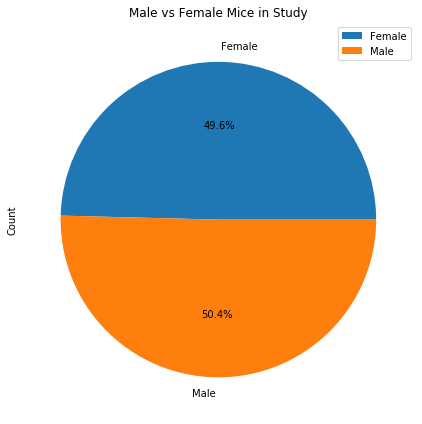

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Use dataframe from previous pie chart exercise and set count column to the frquency for pie chart
sizes = gender_count["Count"]
#use index of dataframe for labels
labels = gender_count.index
plt.figure(figsize = (6,6))
#plot using pyplot and add title, y axis label and legend
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Male vs Female Mice in Study")
plt.legend(loc = "upper right")
plt.ylabel("Count")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#initialize lists needed 
time= []
mouse_name = []
Timept_drug_list = []
#loop through drug regimens
for drug in drug_list:
    #make a new dataframe with only current loop drug regimen
    drug_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == drug),:]
    #find mice for current loop drug regimen
    drug_mice = drug_df["Mouse ID"].unique()
    #loop through mice for current loop drug regimen
    for mouse in range(len(drug_mice)):
        #find max timepoint in dataframe for current loop mouse 
        time_mouse_df = drug_df.loc[drug_df["Mouse ID"] == drug_mice[mouse], :]
        time_mouse = max(time_mouse_df["Timepoint"])  
        #add max timepoint to list
        time.append(time_mouse) 
        #add mouse ID to list
        name = drug_mice[mouse]
        mouse_name.append(name)
        #add drug name to list
        timept_drug = drug
        Timept_drug_list.append(timept_drug)
        
#zip together above lists
Time_lists = list(zip(Timept_drug_list, mouse_name, time))
#make a dataframe from zipped lists and rename columns
Time_df = pd.DataFrame(Time_lists)
Time_df = Time_df.rename(columns = {0:"Drug Regimen", 1:"Mouse ID", 2:"Max Timept"})

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_tumor_drugs_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == drug_list[0])|(clean_mouse_df["Drug Regimen"] == drug_list[1])|(clean_mouse_df["Drug Regimen"] == drug_list[2])|(clean_mouse_df["Drug Regimen"] == drug_list[3])]
Final_tumor_df = pd.merge(Final_tumor_drugs_df,Time_df, on = "Mouse ID")
#filter for only the latest timepoint data
Final_tumor_df = Final_tumor_df.loc[Final_tumor_df["Timepoint"] == Final_tumor_df["Max Timept"]]
Final_tumor_df


,Mouse ID,Drug Regimen_x,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y,Max Timept
9,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,Capomulin,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,Capomulin,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,Capomulin,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,Ramicane,45
...,...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,Ceftamin,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,Infubinol,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_Capomulin = []
tumor_vol_Ramicane = []
tumor_vol_Infubinol = []
tumor_vol_Ceftamin = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_df = Final_tumor_df.loc[Final_tumor_df["Drug Regimen_x"] == drug,:]
    if drug == "Capomulin":
        tumor_vol_Capomulin = tumor_df["Tumor Volume (mm3)"]
    elif drug == "Ramicane":
        tumor_vol_Ramicane = tumor_df["Tumor Volume (mm3)"]
    elif drug == "Infubinol":
        tumor_vol_Infubinol = tumor_df["Tumor Volume (mm3)"]
    else:
        tumor_vol_Ceftamin = tumor_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_Capomulin = tumor_vol_Capomulin.quantile([0.25,0.5,0.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
lower_bound_Capomulin = lowerq_Capomulin-(1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin+(1.5*iqr_Capomulin)

quartiles_Ramicane = tumor_vol_Ramicane.quantile([0.25,0.5,0.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
lower_bound_Ramicane = lowerq_Ramicane-(1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane+(1.5*iqr_Ramicane)

quartiles_Infubinol = tumor_vol_Infubinol.quantile([0.25,0.5,0.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
lower_bound_Infubinol= lowerq_Infubinol-(1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol+(1.5*iqr_Infubinol)

quartiles_Ceftamin = tumor_vol_Ceftamin.quantile([0.25,0.5,0.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
lower_bound_Ceftamin= lowerq_Ceftamin-(1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin+(1.5*iqr_Ceftamin)

    
# Determine outliers using upper and lower bounds
#Outliers for Capomulin 
outlier_Capomulin = []
for value in tumor_vol_Capomulin:
    if value> upper_bound_Capomulin:
        outlier_Capomulin.append(value)
    elif value < lower_bound_Capomulin:
        outlier_Capomulin.append(value)
#Outliers for Ramicane
outlier_Ramicane = []
for value in tumor_vol_Ramicane:
    if value> upper_bound_Ramicane:
        outlier_Ramicane.append(value)
    elif value < lower_bound_Ramicane:
        outlier_Ramicane.append(value)
#Outliers for Infubinol
outlier_Infubinol = []
for value in tumor_vol_Infubinol:
    if value> upper_bound_Infubinol:
        outlier_Infubinol.append(value)
    elif value < lower_bound_Infubinol:
        outlier_Infubinol.append(value)
#Outliers for Ceftamin
outlier_Ceftamin = []
for value in tumor_vol_Ceftamin:
    if value> upper_bound_Ceftamin:
        outlier_Ceftamin.append(value)
    elif value < lower_bound_Ceftamin:
        outlier_Ceftamin.append(value)


print(f"For Capomulin, values above {round(upper_bound_Capomulin,2)} and values below {round(lower_bound_Capomulin,2)} may be outliers. {len(outlier_Capomulin)} outlier(s) found.")
print(f"For Ramicane, values above {round(upper_bound_Ramicane,2)} and values below {round(lower_bound_Ramicane,2)} may be outliers. {len(outlier_Ramicane)} outlier(s) found.")
print(f"For Infubinol, values above {round(upper_bound_Infubinol,2)} and values below {round(lower_bound_Infubinol,2)} may be outliers. {len(outlier_Infubinol)} outlier(s) found.")
print(f"For Ceftamin, values above {round(upper_bound_Ceftamin,2)} and values below {round(lower_bound_Ceftamin,2)} may be outliers. {len(outlier_Ceftamin)} outlier(s) found.")

For Capomulin, values above 51.83 and values below 20.7 may be outliers. 0 outlier(s) found.
For Ramicane, values above 54.31 and values below 17.91 may be outliers. 0 outlier(s) found.
For Infubinol, values above 82.74 and values below 36.83 may be outliers. 1 outlier(s) found.
For Ceftamin, values above 87.67 and values below 25.36 may be outliers. 0 outlier(s) found.


Text(0.5, 1.0, 'Final Tumor Volume per Drug Regimen')

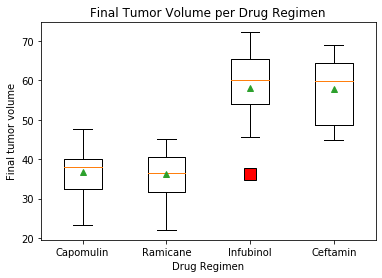

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x1 = tumor_vol_Capomulin
x2 = tumor_vol_Ramicane
x3 = tumor_vol_Infubinol
x4 = tumor_vol_Ceftamin
#source: https://matplotlib.org/3.2.1/gallery/statistics/boxplot.html
#change formatting for outlier
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
#plot all boxplots on one figure
plt.boxplot ([x1, x2, x3, x4], labels = ['Capomulin','Ramicane',"Infubinol","Ceftamin"], flierprops = flierprops, showmeans=True)
#add x and y labels, and title
plt.xlabel("Drug Regimen")
plt.ylabel("Final tumor volume")
plt.title("Final Tumor Volume per Drug Regimen")


## Line and Scatter Plots

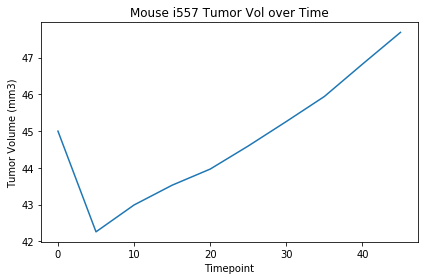

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Showing plot for i557, treated with Capomulin
#find i557 in original dataframe
i557_df= clean_mouse_df.loc[(clean_mouse_df["Mouse ID"] == "i557"),:]
#get timepoints and tumor volumes
x_values_line = i557_df["Timepoint"]
y_values_line = i557_df["Tumor Volume (mm3)"]
#plot line chart and format with labels and title
plt.plot(x_values_line, y_values_line)
plt.title("Mouse i557 Tumor Vol over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

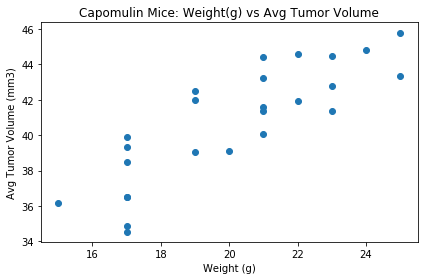

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#find Capomulin in original dataframe
Cap_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin"),:]
#find mice for this drug regimen
Cap_mice = Cap_df["Mouse ID"].unique()
#initialize needed lists
Avg_tum = []
Cap_mice_names = []
Cap_weight = []

#loop through mice in Capomulin regimen
for x in range(len(Cap_mice)):
    cap_mouse_df = Cap_df.loc[Cap_df["Mouse ID"] == Cap_mice[x], :]
    #get average tumor volume for each mouse and add to list
    avg_tumor_vol = round(cap_mouse_df["Tumor Volume (mm3)"].sum()/cap_mouse_df["Tumor Volume (mm3)"].count(),2)
    Avg_tum.append(avg_tumor_vol) 
    #get mouse ID and add to list
    Cap_mouse = Cap_mice[x]
    Cap_mice_names.append(Cap_mouse)
    #get mouse weight and add to list
    mouse_weight = cap_mouse_df["Weight (g)"].sum()/cap_mouse_df["Weight (g)"].count()
    Cap_weight.append(mouse_weight)
    
#zip lists together and create a dataframe
Cap_info_list = list(zip(Cap_mice_names, Cap_weight, Avg_tum))
Cap_avg_tum_wt_df = pd.DataFrame(Cap_info_list)

#set x values to weight data and y values to average tumor data
x_values_scatter = Cap_avg_tum_wt_df[1]
y_values_scatter = Avg_tum
#plot scatter chart and format with x,y labels and title
plt.scatter(x_values_scatter,y_values_scatter)
plt.title("Capomulin Mice: Weight(g) vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.tight_layout()


## Correlation and Regression

The correlation between weight and average tumor volume is 0.84.
The r-squared value is 0.71. This is a strong correlation.


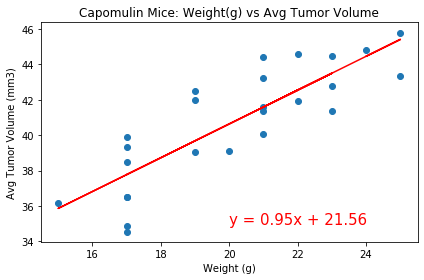

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correlation coefficient
correlation = st.pearsonr(x_values_scatter,y_values_scatter)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}.")
#calculate linear regression for weight vs average tumor vol
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values_scatter,y_values_scatter)
#set equation needed to get regression values using y = mx +b
regress_values = x_values_scatter*slope + intercept
#get equation of a line for printing on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter chart
plt.scatter(x_values_scatter,y_values_scatter)
#plot regression values on the same chart
plt.plot(x_values_scatter,regress_values, "-r")
#add equation of line describing data set
plt.annotate(line_eq, (20,35), fontsize = 15, color = 'red')
#format with title, x and y labels
plt.title("Capomulin Mice: Weight(g) vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.tight_layout()
#print R^2 value
print(f"The r-squared value is {round(rvalue**2,2)}. This is a strong correlation.")